![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

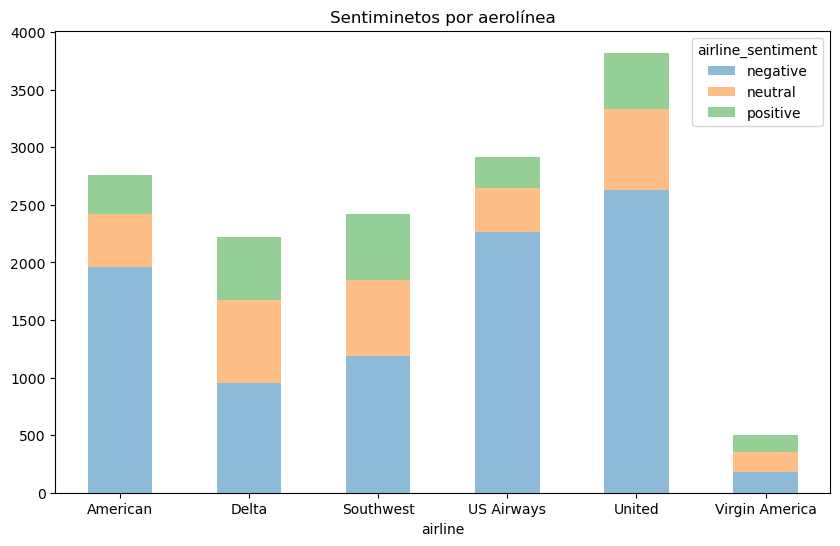

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# librerías
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [12]:
# guardar los resultados de cada punto (para el 5)
lista_accuracy=[]
# crear un objeto CountVectorizer para preprocesar los datos train y test
# (aplicable para todos los puntos)
vect_A = CountVectorizer()
X_tok_train = vect_A.fit_transform(X_train)
X_tok_test = vect_A.transform(X_test)
# se crea un modelo rfc, se entrena con los datos transformados, y se calcula su rendimiento
rf_model = RandomForestClassifier(random_state=42) #se emplean parámetros default, pero se controla aleatoriedad

rf_model.fit(X_tok_train, y_train)

y_pred = rf_model.predict(X_tok_test)

accuracy = accuracy_score(y_test, y_pred)
lista_accuracy.append(accuracy)
print(f"Accuracy modelo usando CountVectorizer: {accuracy: .4f}")

Accuracy modelo usando CountVectorizer:  0.7711


Se observa que el modelo base usando CountVectorizer tiene un desempeño relativamente alto, en cuanto en la mayoría de los casos identifica correctamente el sentimiento del texto (negativo, positivo o neutral).

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
# crear un objeto CountVectorizer para preprocesar los datos train y test
# Eliminación de stopwords al usar el parámetro 'stop_words' de la función CountVectorizer()
vect_B = CountVectorizer(stop_words='english') #el texto está en inglés
X_tok_train = vect_B.fit_transform(X_train)
X_tok_test = vect_B.transform(X_test)
# se crea un modelo rfc, se entrena con los datos transformados, y se calcula su rendimiento
rf_model = RandomForestClassifier(random_state=42) #se emplean parámetros default, pero se controla aleatoriedad

rf_model.fit(X_tok_train, y_train)

y_pred = rf_model.predict(X_tok_test)

accuracy = accuracy_score(y_test, y_pred)
lista_accuracy.append(accuracy)
print(f"Accuracy modelo usando CountVectorizer y Stopwords: {accuracy: .4f}")

Accuracy modelo usando CountVectorizer y Stopwords:  0.7618


Se observa que el desempeño del modelo disminuye al eliminar stopwords. Aunque a primera vista no es intuitivo por qué, puede que en este caso, donde se trata de tweets, las cuales son publicaciones relativamente cortas, el uso de stopwords dé contexto valioso al mensaje, y al eliminarlo este se pierde. Se profundizará más al respecto en los puntos siguientes.

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
# librerías
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import nltk
#nltk.download('wordnet')

In [15]:
# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word, pos="v") for word in words] #pos=v para lematización con verbos

In [16]:
# crear un objeto CountVectorizer para preprocesar los datos train y test
# el parámetro analyze usa la función recién creada, para lematización
vect_lemas = CountVectorizer(analyzer=split_into_lemmas)
X_tok_train = vect_lemas.fit_transform(X_train)
X_tok_test = vect_lemas.transform(X_test)
# se crea un modelo rfc, se entrena con los datos transformados, y se calcula su rendimiento
rf_model = RandomForestClassifier(random_state=42) #se emplean parámetros default, pero se controla aleatoriedad

rf_model.fit(X_tok_train, y_train)

y_pred = rf_model.predict(X_tok_test)

accuracy = accuracy_score(y_test, y_pred)
lista_accuracy.append(accuracy)
print(f"Accuracy modelo usando CountVectorizer y Lematización: {accuracy: .4f}")


Accuracy modelo usando CountVectorizer y Lematización:  0.7595


En primer lugar, se definió una función llamada split_into_lemmas que recibe un texto como parámetro y devuelve una lista de lemas (asumiendo que cada palabra es un verbo). Luego, se creo un objeto CountVectorizer definiendo como parámetro split_into_lemmas, esto hará que cuando se use CountVectorizer primero se tokenizará el texto dividiendolo en temas y luego se construirá la matriz.
 
Luego, se creó un vectorizador que transforma los datos de entrenamiento (X_train_dtm) y prueba (X_test_dtm). Se entrena un modelo Random Forest usando los datos definidos en el paso anterior y se realizan las predicciones usando la matriz X_test_dtm. Finalmente, se evalúa el desempeño del modelo obteniendo un Acurracy de 0.759, lo que indica que el modelo Random Forest usando lematización predijo correctamente el sentimiento de los tweets un 76% de las veces.

Se observa que el modelo que emplea lematización no supera el rendimiento del modelo base (punto 1), de forma similar al punto 2. De nuevo, esto puede deberse a que posiblemente aplicar técnicas adicionales sobre textos cortos sobresimplifica los datos y resta información valiosa al modelo.

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [17]:
# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word, pos="v") for word in words] #pos=v para lematización con verbos

In [18]:
# crear un objeto CountVectorizer para preprocesar los datos train y test
# Eliminación de stopwords al usar el parámetro 'stop_words' de la función CountVectorizer()
vect_B = CountVectorizer(stop_words='english', analyzer=split_into_lemmas) #el texto está en inglés
X_tok_train = vect_B.fit_transform(X_train)
X_tok_test = vect_B.transform(X_test)
# se crea un modelo rfc, se entrena con los datos transformados, y se calcula su rendimiento
rf_model = RandomForestClassifier(random_state=42) #se emplean parámetros default, pero se controla aleatoriedad

rf_model.fit(X_tok_train, y_train)

y_pred = rf_model.predict(X_tok_test)

accuracy = accuracy_score(y_test, y_pred)
lista_accuracy.append(accuracy)
print(f"Accuracy modelo usando CountVectorizer, Stopwords y Lematización: {accuracy: .4f}")

Accuracy modelo usando CountVectorizer, Stopwords y Lematización:  0.7595


Se observa que el rendimiento mediante múltiples técnicas es idéntico al obtenido en el punto anterior, lo cual indica que, para el problema actual, incluir la eliminación de stopwords no otorga un beneficio adicional a la lematización.

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [19]:
# librerías
import matplotlib.pyplot as plt
import pandas as pd

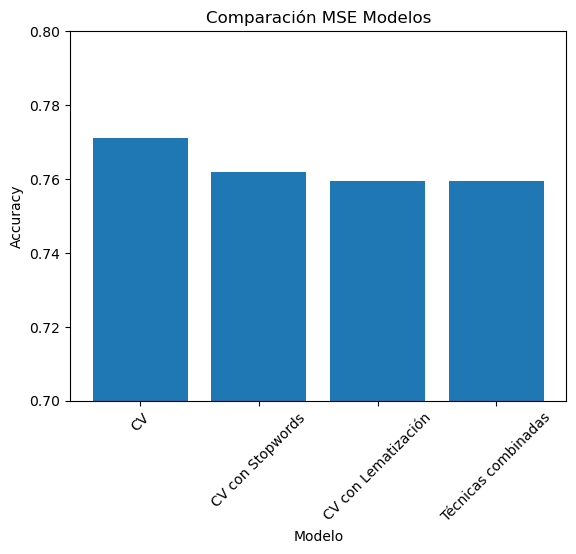

In [20]:
modelos=["CV", "CV con Stopwords", "CV con Lematización", "Técnicas combinadas"] # guardar nombre de los puntos
plt.bar(modelos, lista_accuracy)
plt.xlabel("Modelo")
plt.ylabel("Accuracy")
plt.title("Comparación MSE Modelos")
plt.xticks(rotation=45)
plt.ylim(0.7,0.8)
plt.show()

In [21]:
df = pd.DataFrame({
    'Modelo': modelos,  
    'Accuracy': lista_accuracy    
})
df

,Modelo,Accuracy
0,CV,0.771109
1,CV con Stopwords,0.761796
2,CV con Lematización,0.759520
3,Técnicas combinadas,0.759520


Se obtuvo que el modelo más sencillo, aquel que solamente empleó CountVectorizer() sin realizar modificaciones adicionales sobre los datos, tales como la eliminación de palabras comúnes (Stopwords) o lematización, fue el de mejor rendimiento. Esto puede deberse a la naturaleza de los datos, que son publicaciones en la plataforma de Twitter, mejor conocidos como tweets. Los tweets son por naturaleza cortos, por lo cual es probable que cada palabra aporte información valiosa para la clasificación de sentimientos. Observemos los datos a mayor profundidad:

In [22]:
len(X)

14640

In [23]:
for i in range (0, 5):
    print(X.iloc[i])
    print("Numero de caracteres: ",len(X.iloc[i]))

@VirginAmerica What @dhepburn said.
Numero de caracteres:  35
@VirginAmerica plus you've added commercials to the experience... tacky.
Numero de caracteres:  72
@VirginAmerica I didn't today... Must mean I need to take another trip!
Numero de caracteres:  71
@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
Numero de caracteres:  126
@VirginAmerica and it's a really big bad thing about it
Numero de caracteres:  55


In [24]:
total=0
for i in range(0, len(X)):
    total+=len(X.iloc[i])
prom=total/len(X)
print("Promedio de caracteres publicación: ", prom)

Promedio de caracteres publicación:  103.82206284153006


El promedio de caracteres por tweet en el conjunto de datos es de sólamente 104, lo cual corresponde cuanto mucho a un par de oraciones. En un texto de tamaño tan corto, incluir palabras comúnes, así como las derivaciones de una palabra (sin lematizar), puede aportar contexto valioso que mejore el rendimiento del modelo. Se obtuvo que eliminar las stopwords quita aproximadamente un punto de rendimiento al modelo base, mientras que la lematización con o sin stopwords resta aproximadamente 1.2 puntos.